In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
from sklearn.linear_model import LinearRegression
import MMTMSS.models.simple_cascade as sc
from scipy import signal

### Determinist cascade 

In [5]:
dc = sc.multivariate_cascade([[0.3,0.2],[0.25,0.25]], [[0.25,0.25],[0.3,0.2]],6)

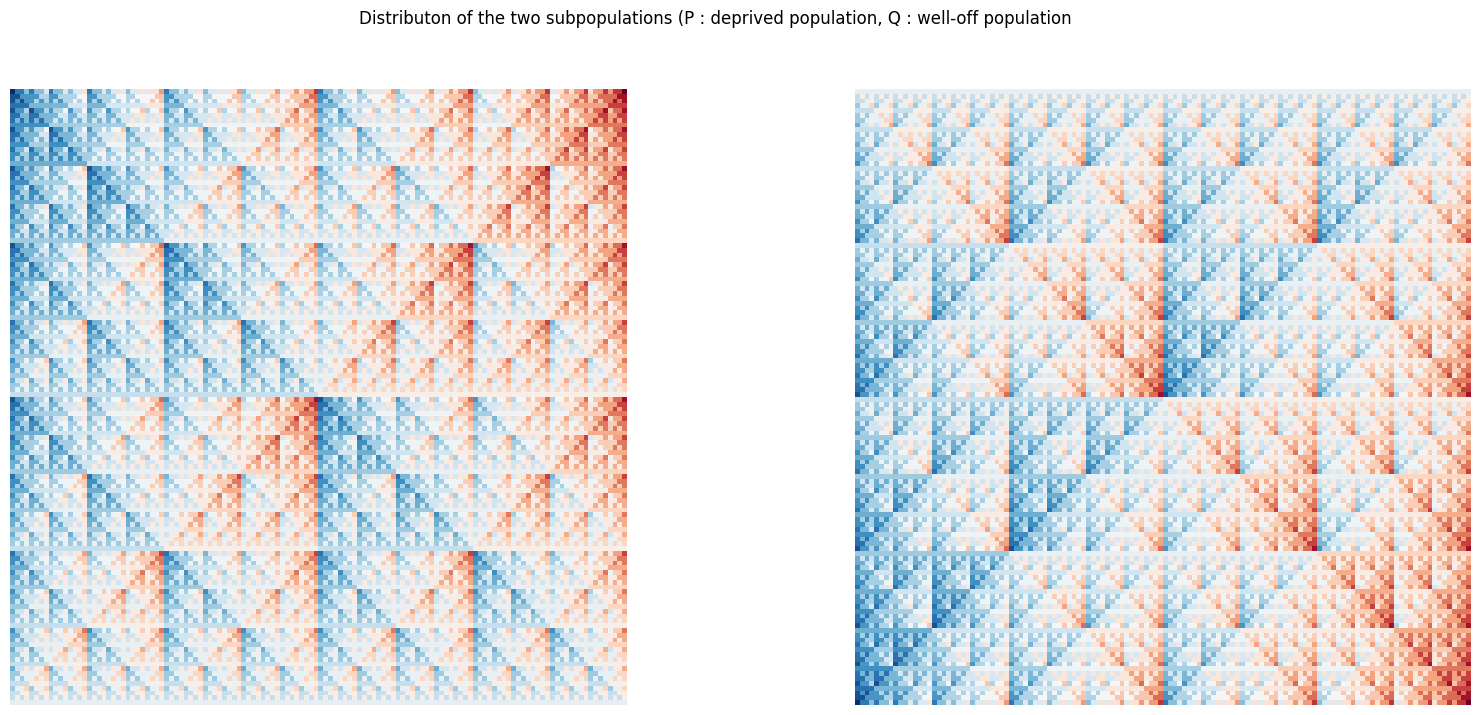

In [6]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.matshow(dc[:,:,0], cmap='RdBu', norm=LogNorm(vmin=np.min(dc), vmax=np.max(dc)))
ax1.axis("off")
fig.suptitle('Distributon of the two subpopulations (P : deprived population, Q : well-off population')
ax2.imshow(dc[:,:,1], cmap='RdBu', norm=LogNorm(vmin=np.min(dc), vmax=np.max(dc)))
ax2.axis("off");

In [7]:
ratio = dc[:,:,0] / (dc[:,:,0] + dc[:,:,1]) * 100

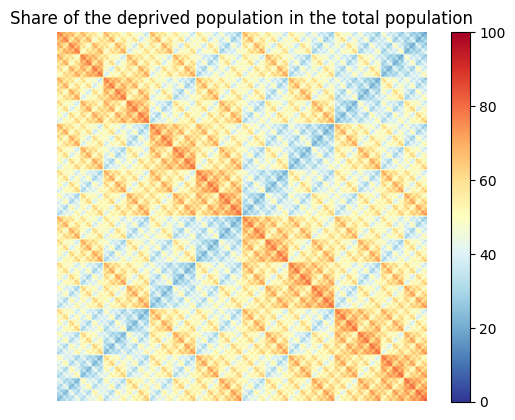

In [8]:
ax=plt.imshow(ratio, vmin=0, vmax=100, cmap="RdYlBu_r")
plt.axis('off');
plt.title('Share of the deprived population in the total population');
plt.colorbar();

### Random lognormal cascade

In [4]:
lnc = sc.multivariate_lognormal_cascade(6, sigma1=1, sigma2=1, corr=0.5)

In [10]:
lnc.shape

(128, 128, 2)

In [52]:
ratio = lnc[:,:,0] / (lnc[:,:,0] +  lnc[:,:,1]) * 100

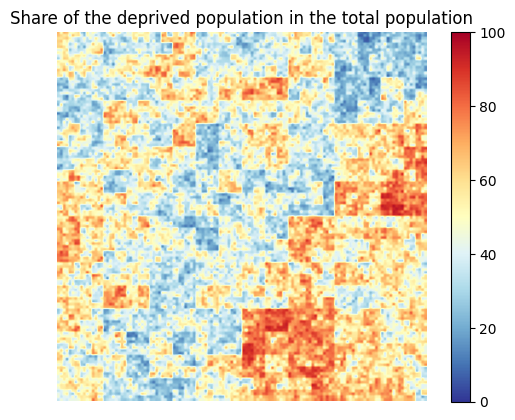

In [53]:
plt.imshow(ratio, vmin=0, vmax=100, cmap="RdYlBu_r")
plt.axis('off');
plt.title('Share of the deprived population in the total population');
plt.colorbar();

In [4]:
def downsizing_sum(a, factor):    
    """
    `a` is the 3-dim input array
    `factors` is the blocksize on which averaging is to be performed
    """

    
    if factor==1:
        padx=0
        pady=0
    else :
        padx= a.shape[0] - (a.shape[0] // factor)*factor 
        pady= a.shape[1] - (a.shape[1] // factor)*factor 
        
    
    a =  np.pad(a, ((0, padx), (0, pady), (0,0))) 
    factors = np.array([factor,factor,1])
    sh = np.column_stack([a.shape//factors, factors]).ravel()
    b = a.reshape(sh).sum(tuple(range(1, 2*a.ndim, 2)))

    return b


In [5]:
def entropy_segregation( frac):
        ptot = np.sum(frac, axis=2)
        Prob = frac / ptot[:, :, np.newaxis]
                #print(Prob[1,1,:])
        P0 = np.sum(frac[:,:,0]) / np.sum(frac[:,:,0] +  frac[:,:,1])
        P1 = np.sum(frac[:,:,1]) / np.sum(frac[:,:,0] +  frac[:,:,1])
        Entropie_globale = -np.log2(P0)*P0 -np.log2(P1)*P1   
        return((Entropie_globale + np.sum(np.sum(np.log2(Prob) * Prob, axis=2) * ptot) / np.sum(ptot) )/Entropie_globale )

In [6]:
def entropie(p):
    psup0 = p[p>0]
    return(-sum(psup0*np.log2(psup0)))


In [31]:
def entropyinter(frac):
    ''' Entropie proposée par François Semecurbe
    Questions pour localiser une paire de personne 
    Mesure de la ségregation'''
    P = frac[:,:,0] * frac[:,:,1]
    P = P / np.sum(P).copy()
    
    return((entropie(frac[:,:,0]**(2**0.5)/np.sum(frac[:,:,0]**(2**0.5))),
             entropie(frac[:,:,1]**(2**0.5)/np.sum(frac[:,:,1]**(2**0.5))),
             entropie(frac[:,:,0]*frac[:,:,1]/np.sum(frac[:,:,0]*frac[:,:,1]))  ))

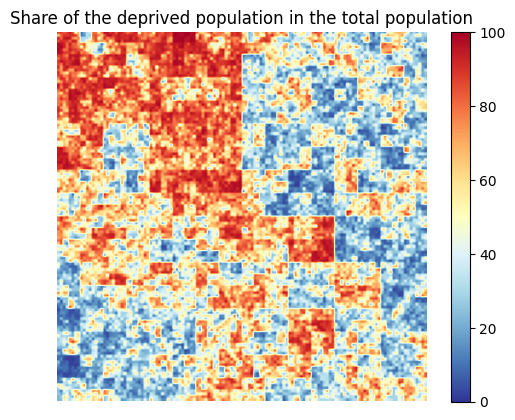

In [12]:
res = [1,2,4, 8,16]

lnc = sc.multivariate_lognormal_cascade(6, sigma1=.5, sigma2=0.5, corr=0.5)

ratio = lnc[:,:,0] / (lnc[:,:,0] +  lnc[:,:,1]) * 100
plt.imshow(ratio, vmin=0, vmax=100, cmap="RdYlBu_r")
plt.axis('off');
plt.title('Share of the deprived population in the total population');
plt.colorbar();



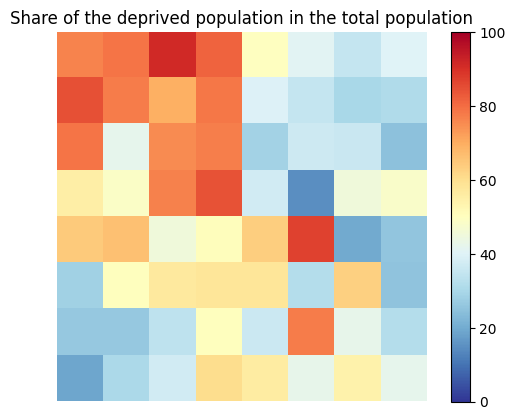

In [16]:
ratio = downsizing_sum(lnc, 16)[:,:,0] / (downsizing_sum(lnc, 16)[:,:,0] +  downsizing_sum(lnc, 16)[:,:,1]) * 100
plt.imshow(ratio, vmin=0, vmax=100, cmap="RdYlBu_r")
plt.axis('off');
plt.title('Share of the deprived population in the total population');
plt.colorbar();

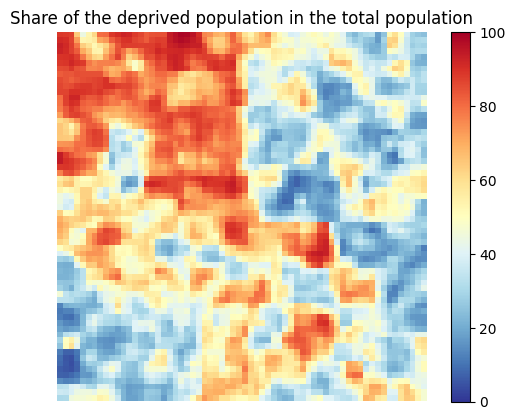

In [23]:
temp = downsizing_sum(lnc, 2)
temp[:,:,0] = signal.convolve2d(temp[:,:,0], np.ones((3,3)), mode='same')
temp[:,:,1] = signal.convolve2d(temp[:,:,1], np.ones((3,3)), mode='same')
ratio = temp[:,:,0]  / (temp[:,:,0] +  temp[:,:,1]) * 100
plt.imshow(ratio, vmin=0, vmax=100, cmap="RdYlBu_r")
plt.axis('off');
plt.title('Share of the deprived population in the total population');
plt.colorbar();

        I_02      I_20       I_11  lres
0  11.057437  9.847618  10.818734   1.0
1   9.242933  8.483294   9.112349   2.0
2   7.397141  6.895455   7.315819   3.0
3   5.511664  5.249032   5.426913   4.0
1.8483111720864198 1.5383597350983957 1.7971991722834706


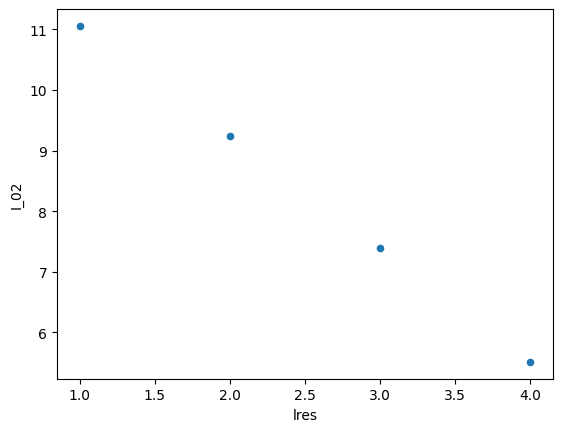

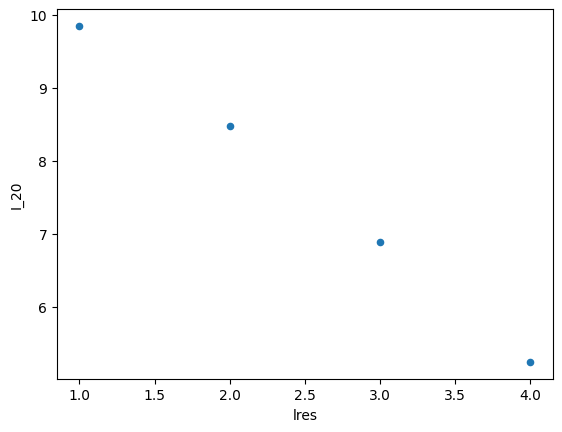

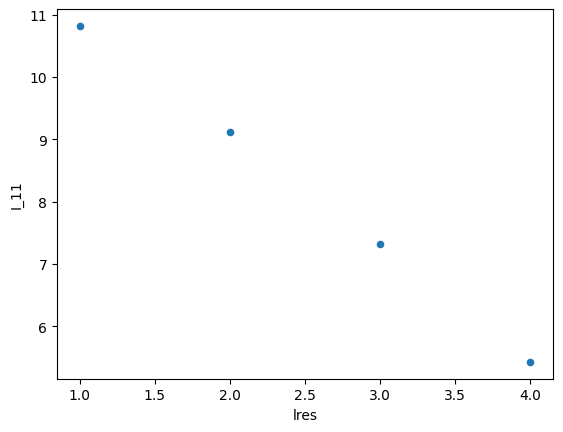

In [10]:
res = [2,4, 8, 16]

lnc = sc.multivariate_lognormal_cascade(6, sigma1=.3, sigma2=0.5, corr=0.5)
#lnc = np.load('data/paris_household.npy')

def leader(x, res):
    temp = downsizing_sum(x, res)
    temp[:,:,0] = signal.convolve2d(temp[:,:,0], np.ones((3,3)), mode='same')
    temp[:,:,1] = signal.convolve2d(temp[:,:,1], np.ones((3,3)), mode='same')
    return(temp)

entropies= [entropyinter(leader(lnc, resi)) for resi in res]
entropies = pd.DataFrame(entropies, columns=['I_02', 'I_20', 'I_11'])
entropies['lres'] = np.log2(res)
print(entropies)
entropies.plot.scatter('lres', 'I_02')
entropies.plot.scatter('lres', 'I_20')
entropies.plot.scatter('lres', 'I_11')

I20 = -LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_02).coef_[0]
I02 = -LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_20).coef_[0]
I11 = -LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_11).coef_[0]

print(I20, I02, I11)

#print(((2+reg20.coef_[0])/2)**0.5)
#print(((2+reg02.coef_[0])/2)**0.5)
#-(reg11.coef_[0] - (reg20.coef_[0] + reg02.coef_[0])/2) 



In [55]:
def test():
    res = [1,2,4, 8,16]

    lnc = sc.multivariate_lognormal_cascade(6, sigma1=.5, sigma2=0.25, corr=0.5)
    #lnc = np.load('data/paris_household.npy')
    #entropies= [entropyinter(leader(lnc, resi)) for resi in res]
    entropies = [entropyinter(downsizing_sum(lnc, resi)) for resi in res]

    entropies = pd.DataFrame(entropies, columns=['I_02', 'I_20', 'I_11'])
    entropies['lres'] = np.log2(res)

    I20 = -LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_02).coef_[0]
    I02 = -LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_20).coef_[0]
    I11 = -LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_11).coef_[0]
    return([I20,I02,I11])


In [56]:
res = [test() for i in range(1000)]
sampleI = pd.DataFrame(res, columns=['I20', 'I02', 'I11'])

In [57]:
sampleI.mean(axis=0)

I20    1.673700
I02    1.917053
I11    1.712780
dtype: float64

In [38]:
2-0.25**2

1.9375

In [207]:
from itertools import repeat

In [208]:
repeat( test(), 10)

repeat([1.43089421028296, 1.4305049154075014, 1.5402939071483823], 10)

In [42]:
LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I    )

LinearRegression()

KeyError: 'I_01'

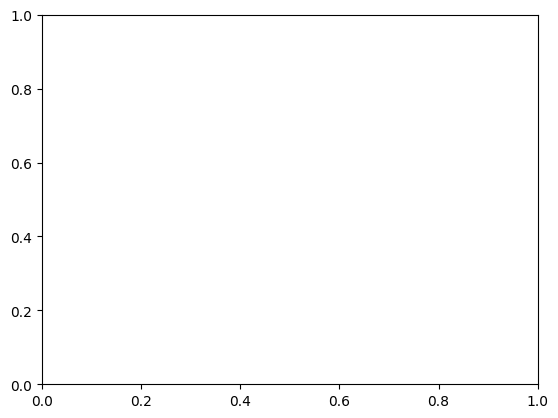

In [95]:
entropies.plot.scatter('lres', 'I_01')

In [83]:
entropy_segregation(downsizing_sum(lnc,2))

0.5974852676163236